In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

# Database connection parameters
db_params = {
    'dbname': 'integration',
    'user': 'postgres',
    'password': '1234',
    'host': 'localhost',
    'port': '5432'
}


In [3]:
# Establishing the connection
conn = psycopg2.connect(**db_params)

# Define your SQL query
query = "SELECT * FROM db_events;"

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(df.head())

C:\Users\Zephyrus\AppData\Local\Temp\ipykernel_7568\3958174467.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   duracion       fecha  hora  esquema                tabla  \
0        38  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
1        42  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
2        27  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
3        15  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
4        21  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   

                                    app  Day of month  ID Day of week  \
0  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
1  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
2  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
3  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
4  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   

  Day of week    mean_st  ...  rango_final_by_table  tamañano_resp_by_table  \
0      sábado  28.165406  ...          7.980910e+07            2.439692e+06   
1      sábado  28.165406

In [4]:
d_row = df[df['pre_clasificacion'] == 'NORMAL']

# Randomly select 50% of those rows
np.random.seed(0)  # For reproducibility
sample_rows_d = d_row.sample(frac=0.7) #0.7

# Drop the selected rows from the original DataFrame
df = df.drop(sample_rows_d.index)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

selected_cols = df[[ 'tabla','app','Day of month','ID Day of week', 'min', 'max',
       'rango_inicial_by_table', 'rango_final_by_table',
       'tamañano_resp_by_table'
       ,'Evento del Dia','SimultJobs','latencia_by_day_month',
       'latencia_by_day_week','pre_clasificacion']]

categorical_columns = ['tabla', 'Evento del Dia','app']
numeric_columns = ['ID Day of week','min','max','SimultJobs','Day of month','rango_inicial_by_table','rango_final_by_table'
                   ,'tamañano_resp_by_table','latencia_by_day_month','latencia_by_day_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_columns),
        ('num', StandardScaler(), numeric_columns)
    ])


encoded_data = preprocessor.fit_transform(selected_cols)

X = encoded_data
y = selected_cols['pre_clasificacion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
from collections import Counter
# Get the frequency of elements in the list
frequency = Counter(y_train)
# Print the frequency
print(frequency)

Counter({'TARDADO': 623694, 'NORMAL': 524564})


In [7]:
from collections import Counter
# Get the frequency of elements in the list
frequency = Counter(y_test)
# Print the frequency
print(frequency)

Counter({'TARDADO': 267297, 'NORMAL': 224814})


In [8]:
categories = preprocessor.named_transformers_['cat'].categories_
for i, category in enumerate(categories):
    print(f"Feature '{categorical_columns[i]}':")
    for code, cat in enumerate(category):
        print(f"  {cat} -> {code}")

Feature 'tabla':
  aux -> 0
  p_act_hi_procinst_ge -> 1
  p_act_hi_taskinst_ge -> 2
  p_act_hi_varinst_iac_ge -> 3
  p_actividad_economica_ge -> 4
  p_actividades_contribuyentes_ge -> 5
  p_adu_exp_def_anio_mes_nit_ag -> 6
  p_adu_imp_def_anio_mes_nit_ag -> 7
  p_adu_imp_definitivas_ag -> 8
  p_adu_tablero_anio_mes_region_cuode_ag -> 9
  p_adu_tipo_cambio_promedio_ponderado_ag -> 10
  p_aduana_ge -> 11
  p_aduanas_ge -> 12
  p_afiliacion_contribuyente_ge -> 13
  p_afiliacion_contribuyentes_dm -> 14
  p_afiliaciones_ge -> 15
  p_afiliaciones_historicas_ag -> 16
  p_afiliaciones_historicas_ultima_ag -> 17
  p_afiliaciones_isr_iva_ag -> 18
  p_afiliaciones_snapshot_ag -> 19
  p_afiliaciones_snapshot_nb_ag -> 20
  p_agente_ge -> 21
  p_agentes_ge -> 22
  p_almacen_temporal_ge -> 23
  p_alzas_vehiculos_ag -> 24
  p_areas_ge -> 25
  p_asiste_libros_ge -> 26
  p_atributos_instancias_ge -> 27
  p_aud_caso_ge -> 28
  p_aud_liquidaciones_ge -> 29
  p_aut_fel_ge -> 30
  p_bitacora_ge -> 31
  p_bi

In [9]:
# Classificador de bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 61.84%


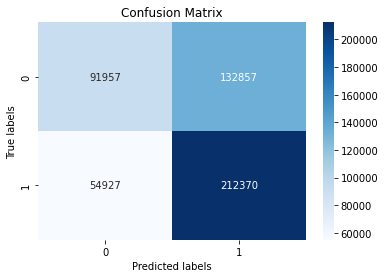

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Normal','Tardado'])
print(report)

              precision    recall  f1-score   support

      Normal       0.63      0.41      0.49    224814
     Tardado       0.62      0.79      0.69    267297

    accuracy                           0.62    492111
   macro avg       0.62      0.60      0.59    492111
weighted avg       0.62      0.62      0.60    492111



In [12]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# Predict for the test data
y_pred_tree = clf_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.45%


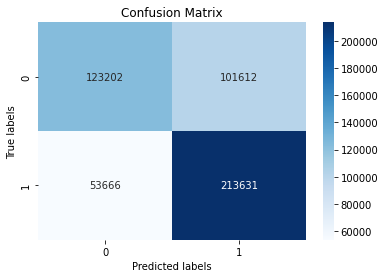

In [13]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
report = classification_report(y_test, y_pred_tree, target_names=['Normal','Tardado'])
print(report)

              precision    recall  f1-score   support

      Normal       0.70      0.55      0.61    224814
     Tardado       0.68      0.80      0.73    267297

    accuracy                           0.68    492111
   macro avg       0.69      0.67      0.67    492111
weighted avg       0.69      0.68      0.68    492111



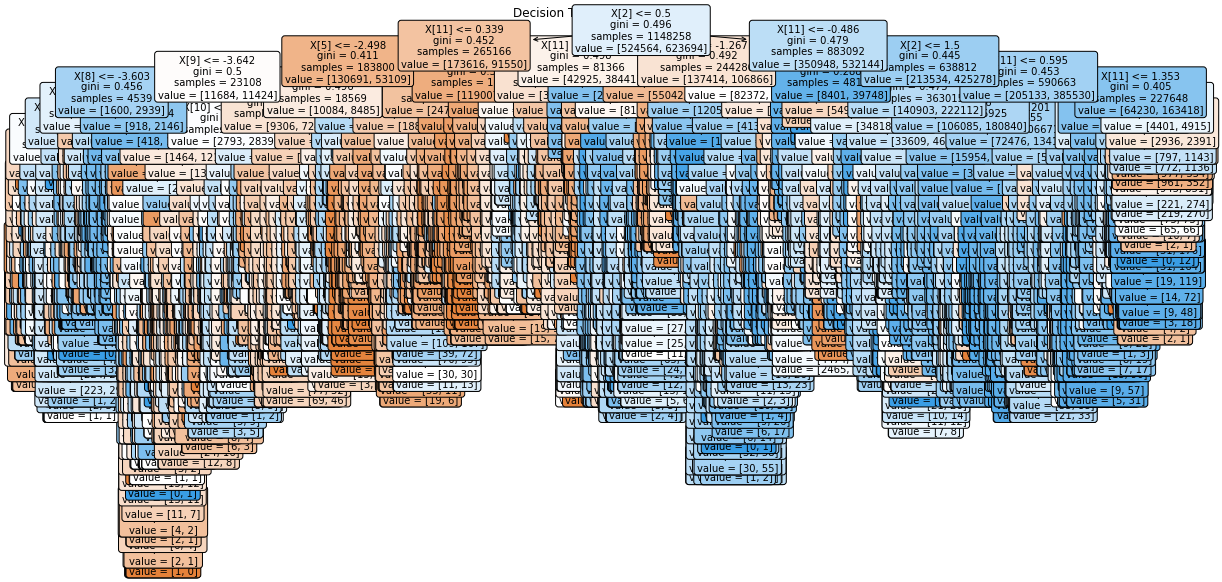

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf_tree,  filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Classification')
plt.show()

In [16]:
from sklearn.naive_bayes import CategoricalNB
# Fit a classification tree model
clf_catNB = CategoricalNB()
clf_catNB.fit(X_train, y_train)

# Predict for the test data
y_pred_cat_nb = clf_catNB.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cat_nb)
print(f'Accuracy: {accuracy * 100:.2f}%')

ValueError: Negative values in data passed to CategoricalNB (input X)

In [17]:
cm = confusion_matrix(y_test, y_pred_cat_nb)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_pred_cat_nb' is not defined

In [18]:
report = classification_report(y_test, y_pred_cat_nb, target_names=['Normal','Tardado'])
print(report)

NameError: name 'y_pred_cat_nb' is not defined

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)

# Predict for the test data
y_pred_forest = clf_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.46%


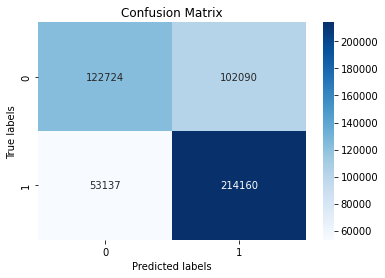

In [20]:
cm = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
report = classification_report(y_test, y_pred_forest, target_names=['Normal','Tardado'])
print(report)

              precision    recall  f1-score   support

      Normal       0.70      0.55      0.61    224814
     Tardado       0.68      0.80      0.73    267297

    accuracy                           0.68    492111
   macro avg       0.69      0.67      0.67    492111
weighted avg       0.69      0.68      0.68    492111



In [22]:
from sklearn.svm import SVC
clf_SVC = SVC(kernel='linear', max_iter=5000)
clf_SVC.fit(X_train, y_train)

# Predict for the test data
y_pred_SVC = clf_SVC.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy: {accuracy * 100:.2f}%')

c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 53.00%


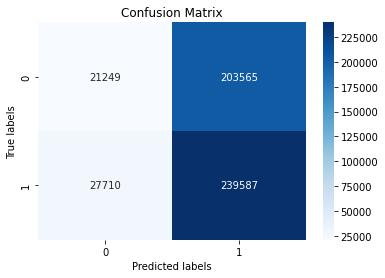

In [23]:
cm = confusion_matrix(y_test, y_pred_SVC)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
report = classification_report(y_test, y_pred_SVC, target_names=['Normal','Tardado'])
print(report)

              precision    recall  f1-score   support

      Normal       0.43      0.09      0.16    224814
     Tardado       0.54      0.90      0.67    267297

    accuracy                           0.53    492111
   macro avg       0.49      0.50      0.41    492111
weighted avg       0.49      0.53      0.44    492111



In [25]:
import joblib

In [26]:
joblib.dump(clf_forest, 'random_fores.pkl')

['random_fores.pkl']

In [27]:
joblib.dump(preprocessor, 'preprocessor_class.pkl')

['preprocessor_class.pkl']